# DEMO
***


Ziel war es, die Lautheitheitsberechnung nach Zwicker (Quelle) in die Software Acoular einzubinden. Zusätzlich wurde zur Visualisierung und besseren Zugänglichkeit der Daten die Möglichkeit eines Lautheiteigenen Plots geschaffen. Diese ist speziell auf Messwerte aus Mikrofonarrays ausgelegt.<br><br>
Dieses Notebook beinhaltet:
- Aufbau der neuen Klassen und deren Verordnung in acoular
- Beispiel zur Stationären Lautheit
- Beispiel zur Zeitvarianten Lautheit
- Beispiel zur Anwendung im Beamform Workflow

***
## Implementierung einer Klasse zur Berechnung der Lautheit in Acoular
Aufbau der Klassen `_Loudness` `LoudnessStationary` `LoudnessTimevariant` `_PlotclassST` `_PlotclassTV` `PointBrowser`




<div class="alert alert-block alert-info">
<b>Hinweis:</b> Für die Berechnung der Lautheit wird das Modul <a href = https://mosqito.readthedocs.io/en/latest/index.html> MOSQITO </a> verwendet. Dieses ist in der Environment zu installieren! <br>
<code>pip install mosqito</code>

</div>

In [11]:
import os

orgpath = os.getcwd()
os.chdir(os.path.split(orgpath)[0])

from acoular import (
    BeamformerTime,
    Environment,
    LoudnessStationary,
    LoudnessTimevariant,
    MaskedTimeSamples,
    MicGeom,
    RectGrid,
    SteeringVector,
    TimeInOut,
    TimeSamples
)

os.chdir(orgpath)

#module zur Darstellung der Beamformingergebnisse
from pylab import imshow, show
import numpy as np

#zur Anwendung der interaktiven Fenster muss ein passendes backend verwendet werden
%matplotlib widget

***
## Stationäre Lautheitsberechnung
Zur Demonstration wird als stationäres Geräusch das "Weiße Rauschen" aus drei Quellen betrachtet. Vergleiche dazu die `acoular_demo.py`.
Als Vorbereitung zur Lautheitsberechnung müssen aus den Messdaten und den Mikrofonkoordinaten für acoular nutzbare Objekte Instanziert werden. Wärend das `TimeSamples` Objekt obligatorisch für die Berechnung ist, werden die Mikrofonkoordinaten nur im Falle der graphischen Auswertung benötigt.

In [12]:
datafile = os.path.join(os.getcwd(),'data', 'three_sources.h5')
micgeofile = os.path.join(os.getcwd(),'data', 'array_64.xml')

mg = MicGeom(from_file = micgeofile)
ts = MaskedTimeSamples(name = datafile)

Die Lautheit stationärer Geräusche wird mit der Instanzierung der Klasse `LoudnessStationary` berechnet. Dazu muss das TimeSamples Objekt als `source` übergeben werden. Da in den Loudness Klassen bereits Plotfunktionen enthalten sind, lässt sich durch `show` das Ergebnis graphisch darstellen. Zur korrekten Darstellung muss `show` das MicGeom Objekt, welches die Mikrofonanordnung enthält, übergeben werden.

source changed
Calculating stationary loudness... depending on the file size, this might take a while
signal resampled to 48 kHz


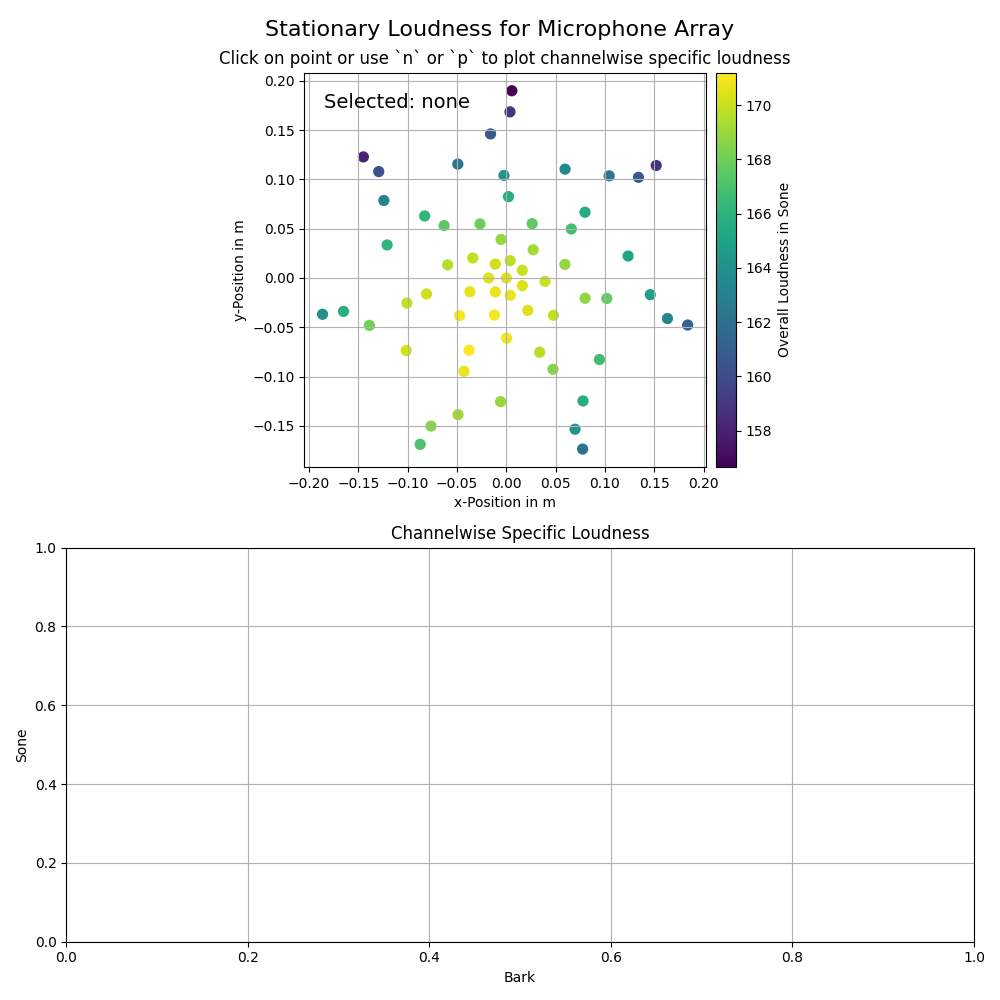

In [15]:
ld_st = LoudnessStationary(source=ts)
ld_st.visualize(mg)

<div class="alert alert-block alert-info">
<b>Info:</b> Es erscheint der Hinweis, dass das Signal auf 48 kHz resampled wurde. Dies liegt an dem verwendeten Algorithmus, der 48 kHz vorschreibt.
</div>

Es sollte sich folgendes Fenster geöffnet haben:
<div style="text-align: center;">
  <img src="data\example_PlotStationary.png" alt="example_PlotStationary" width="800">
</div>

<br>

Der Plot ist interaktiv gestaltet. Durch Auswahl der Mikrofonpunkte lässt sich die 
Verteilung der spezifischen Lautheit des zugehörigen Kanals anzeigen. Die Kanäle
lassen sich außerdem mit **n** (next) und **p** (previous) durchschalten.<br>
Die Farbe der Mikrofonpunkte indiziert die Lautheit des gemessenen Signals.

***
# Zeitvariante Lautheitsberechnung
Zur Demonstration der zeitvarianten Lautheit wird ein neues Signal eingelesen. Bei der `example_data.h5` handelt es sich um eine Windkanalmessung eines Tragflügels. Auch hier ist die Verwendung des `MicGeom` Objekts nur für die Visualisierung nötig.

source changed
Calculating timevariant loudness... depending on the file size, this might take a while
signal resampled to 48 kHz


/opt/anaconda3/envs/acoular/lib/python3.12/site-packages/traitlets/traitlets.py:1385: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  warn(


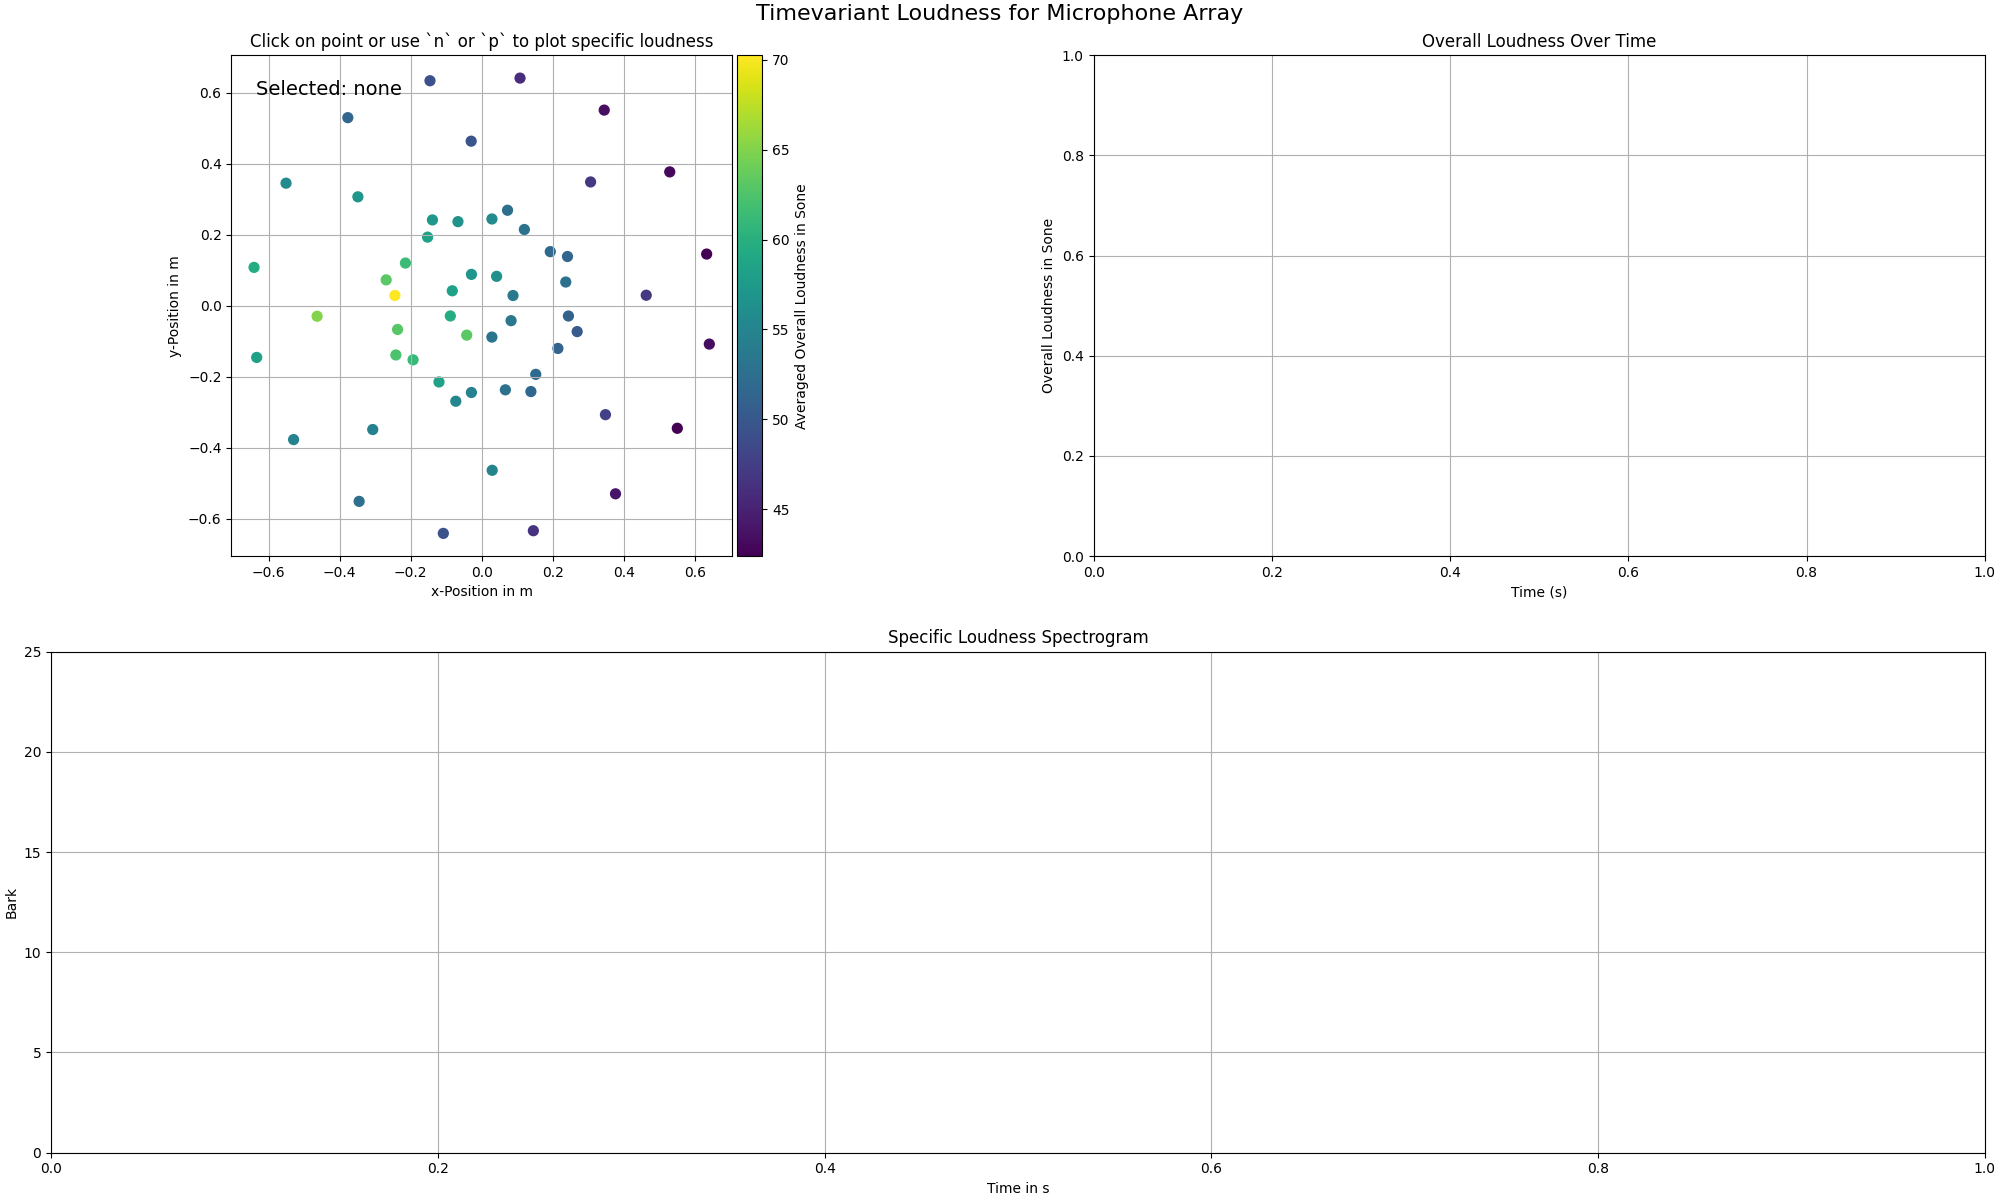

In [16]:
datafile = os.path.join(os.getcwd(),'data','example_data.h5')
micgeofile = os.path.join(os.getcwd(),'data','array_56.xml')

mg = MicGeom(from_file = micgeofile)
ts = TimeSamples(name = datafile)

ld_tv = LoudnessTimevariant(source = ts)
ld_tv.visualize(mg)

Es sollte sich folgendes Fenster geöffnet haben:
<div style="text-align: center;">
  <img src="data\example_PlotVariant.png" alt="example_PlotVariant" width="500">
</div>
Der Plot besteht aus drei Bereichen. Oben links steht wie bereits aus der Stationären Lautheit bekannt die Mikrofonverteilung. Die Interaktivität ist wieder gegeben. Diesmal trifft die Farbindizierung eine Aussage über den Lautheitsdurchschnitt über die Zeit. Oben rechts wird für den angewählten Kanal der zeitliche Verlauf der Lautheit dargestellt. Zuletzt trifft das unten stehende Spektogramm Aussagen über die spezifischen Lautheitswerte des gewählten Kanals.

***
# Anwendung in Acoular Workflow

Dieses Beispiel steht exemplarisch für die mögliche Verwendung der Lautheitberechnung im Kontext des Beamformings. Beamforming hat das Ziel aus an verschiedenen Orten gemessenen Daten die Quelle eines Geräuschs zu rekonstruieren. Sofern die dabei Beamformer verwendet werden, die nicht in der Frequenz- sondern der Zeitdomäne arbeiten, lässt sich mit diesen Zeitsignalen die Lautheit an einem beliebigen Ort bestimmen.

Diese Beispiel orientiert sich stark am `example_airfoil_in_open_jet_time_beamforming.py`. Zunächst werden wie bereits bekannt die Daten eingelesen. Im Fall des Beamformings ist das `MicGeom` Objekt nicht mehr optinal. Außerdem wird mit `RectGrid` ein Raster erzeugt, an dem sich später die Kanäle mit den Ortseigenen Zeitsignalen orientieren. `Environment` legt die Schallgeschwindigkeit fest und wird benötigt, um die Schallrekonstruktion korrekt auszuführen. `SteeringVector` verknüpft die Mikrofonanordnung, das Raster sowie die Schallgeschwindigkeit und bildet zusammen mit dem `MaskedTimeSample` Objekt den Input für den Beamformer. `MaskedTimeSample` gibt dem Anwender die Möglichkeit die eingelesenen Daten selektiert weiterzuleiten. Beispielsweise lässt sich der Start- und Endpunkt wählen. Außerdem können einzelne Mikrofonkanäle aus der Berechnung ausgeschlossen werden. Im vorliegenden Fall soll wieder die Stationäre Lautheit berechnet werden. Dazu ist es Sinnvoll den Start zu verschieben, da wie in der zeitvarianten Berechnung der Mikrofonkanäle ersichtlich wurde, dass die Lärmquelle erst ab 0,2 s ein annähernd stationäres Verhalten zeigt.

In [3]:
datafile = os.path.join(os.getcwd(),'data','example_data.h5')
micgeofile = os.path.join(os.getcwd(),'data','array_56.xml')

mg = MicGeom(from_file=micgeofile)
ts = MaskedTimeSamples(name=datafile)

#ts.start = 0.2*48000

rg = RectGrid(x_min=-0.6, x_max=0.0, y_min=-0.3, y_max=0.3, z=0.68, increment=0.05)
env = Environment(c=346.04)
st = SteeringVector(grid=rg, mics=mg, env=env)

bt = BeamformerTime(source=ts, steer=st)



source changed
Calculating stationary loudness... depending on the file size, this might take a while
signal resampled to 48 kHz


/opt/anaconda3/envs/acoular/lib/python3.12/site-packages/traitlets/traitlets.py:1385: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  warn(


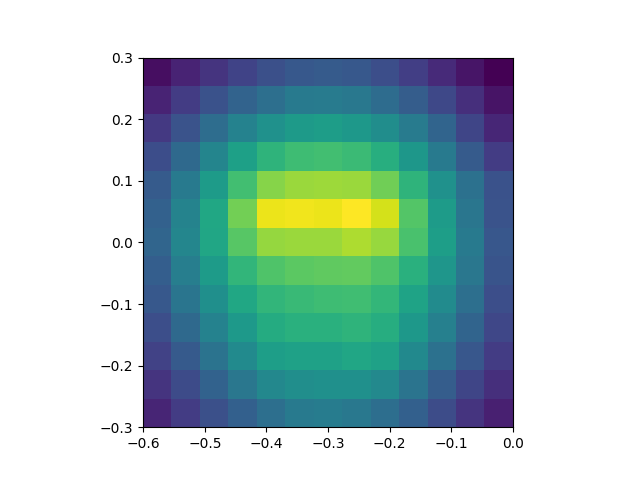

In [4]:
ld_bt = LoudnessStationary(source=bt, field_type = "diffuse")

oal = ld_bt.overall_loudness
oal = oal.reshape(rg.shape)

from pylab import imshow, show
import numpy as np

imshow(oal, vmax=np.max(oal), origin='lower', interpolation='nearest', extent=rg.extend())
show()

Mit Masked Timesample Zeigen, dass für Beliebigen Punkt/Channel auch Timevariant ausgegeben werden kann
Außerdem: Sample Wahl, 

Vollständige beschriftung des graphen


Defaultwert Free

In [5]:
ld_tv_bt = LoudnessTimevariant(source =bt)

source changed
Calculating timevariant loudness... depending on the file size, this might take a while
signal resampled to 48 kHz


<div style="text-align: center;">
  <img src="data\example_PlotBeam.png" alt="example_PlotBeam" width="400">
</div>

# Markdown style options

> Text that will be indented when the Markdown is rendered.

- Main bullet point
     - Sub bullet point

`string`


# for titles
## for major headings
### for subheadings
#### for 4th level subheadings


Bold text: __string__ or **string**
Italic text: _string_ or *string*
***
<div class="alert alert-block alert-info">
<b>Tip:</b> Use blue boxes (alert-info) for tips and notes. 
If it’s a note, you don’t have to include the word “Note”.
</div>
<div class="alert alert-block alert-warning">
<b>Example:</b> Use yellow boxes for examples that are not 
inside code cells, or use for mathematical formulas if needed.
</div>
<div class="alert alert-block alert-success">
<b>Up to you:</b> Use green boxes sparingly, and only for some specific 
purpose that the other boxes can't cover. For example, if you have a lot 
of related content to link to, maybe you decide to use green boxes for 
related links from each section of a notebook.
</div>
<div class="alert alert-block alert-danger">
<b>Just don't:</b> In general, avoid the red boxes. These should only be
used for actions that might cause data loss or another major issue.
</div>